<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_kmeans/EjercicioClustering_SantiagoRuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
mpg = sns.load_dataset("mpg")
mpg= mpg.drop('model_year',1)
mpg= mpg.drop('cylinders',1)

In [33]:
mpg.head()

,mpg,displacement,horsepower,weight,acceleration,origin,name
0,18.0,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu
1,15.0,350.0,165.0,3693,11.5,usa,buick skylark 320
2,18.0,318.0,150.0,3436,11.0,usa,plymouth satellite
3,16.0,304.0,150.0,3433,12.0,usa,amc rebel sst
4,17.0,302.0,140.0,3449,10.5,usa,ford torino


In [0]:
mpg_num=mpg.select_dtypes(include='number')
mpg_nnan=mpg_num.dropna()


In [35]:
mpg_nnan.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

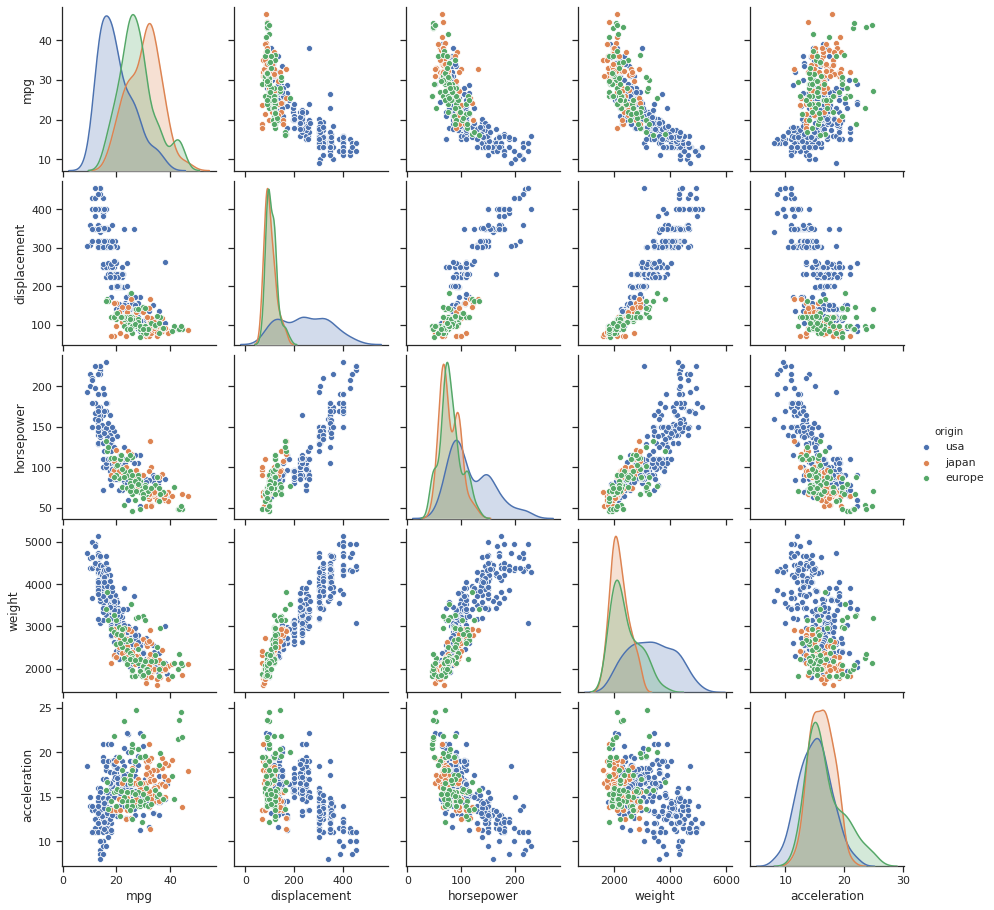

In [36]:
sns.pairplot(mpg, hue="origin")

# Selecciono 3 grupos para comparar con los grupos de origen


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


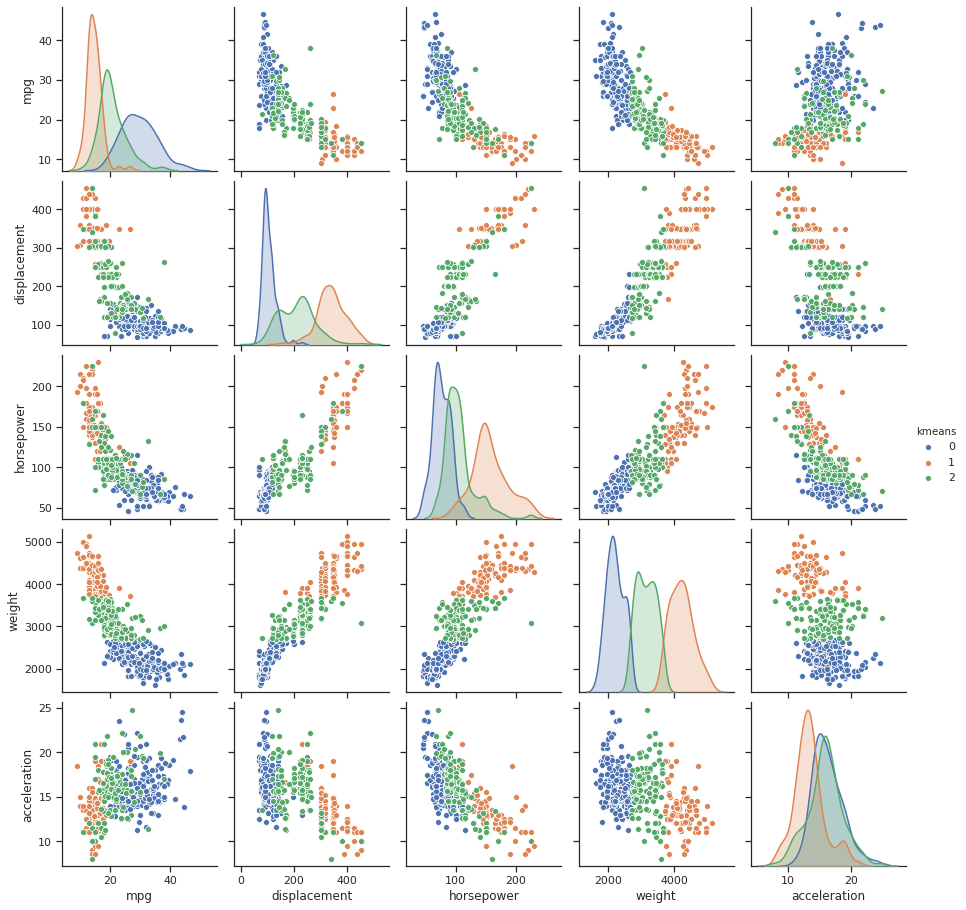

In [37]:
from sklearn.cluster import KMeans
X = mpg_nnan[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration']]
group = KMeans(n_clusters=3).fit_predict(X)
mpg_grouped = mpg_nnan
mpg_grouped['kmeans'] = group
g = sns.pairplot(mpg_grouped, hue="kmeans")

In [46]:
gr = KMeans(n_clusters=3).fit(X)
print(gr.labels_)
print(gr.cluster_centers_)
print(gr.n_iter_)

[2 0 2 2 2 0 0 0 0 0 2 2 0 2 1 2 2 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 2 2 2 2
 0 0 0 0 0 0 0 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 2 0 0 0 0 1 0 0 0
 0 2 1 2 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 1 0 0 0 0 2 1 1 1 1
 1 1 1 0 0 1 1 1 2 2 1 2 2 2 2 2 1 1 1 1 0 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 1 1
 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 0 2 2 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 2 2 2 2 0 0 0 0 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 1 1 1 1 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 0 0 0 0 0 0 2 0 1 1 1 1 2
 0 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 2 2 1 1 1 1 1 2 2 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 2]
[[  14.63555556  344.14444444  157.81111111 4236.32222222   13.46333333]
 [  29.65166667  107.20833333   77.16666667 2222.82777778   16.33444444]
 [  20.78934426  212.6147541   105.40163934 3162.58196721 